In [13]:
import os.path
import re
import os
import requests
import zipfile
import io
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

from os import path

In [5]:
if path.exists('/content/data') == False:
  os.mkdir('/content/data')

os.chdir('/content/data')
!pwd
!ls

/content/data


In [6]:
zip_file_url = "https://zenodo.org/records/1188976/files/Audio_Song_Actors_01-24.zip?download=1"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('/content/data/song')

In [7]:
zip_file_url = "https://zenodo.org/records/1188976/files/Audio_Speech_Actors_01-24.zip?download=1"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('/content/data/speech')

In [9]:
y, sr = librosa.load('/content/data/speech/Actor_01/03-01-01-01-01-01-01.wav')
yt,_=librosa.effects.trim(y)

In [10]:
y=yt

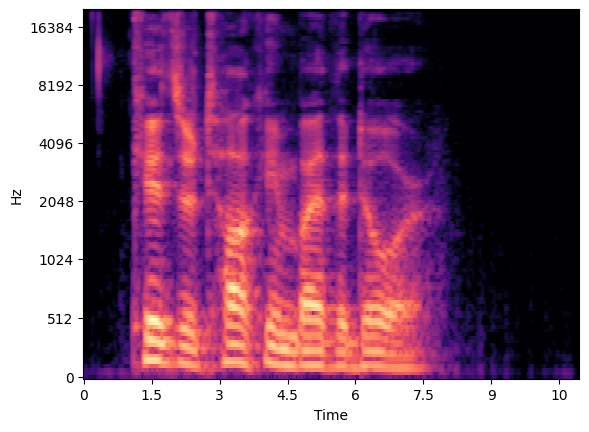

In [11]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
#plt.title('Mel Spectrogram');
# plt.savefig('x.jpeg')

In [14]:
dicts={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}

In [15]:
path_main='/content/data'
folders_main=os.listdir(path_main)

In [16]:
folders_main

['speech', 'song']

In [ ]:
counter=0
for folders in folders_main :
    path_in='{0}/{1}'.format(path_main, folders)
    files_sub=os.listdir(path_in)
    for file in files_sub :
        numbers = re.findall('\d+',file)
        emotion=dicts[numbers[2]]
        print(numbers[6],emotion)
        path_save='sorted_data/{0}/{1}.jpeg'.format(emotion,file)
        path_load='{0}/{1}'.format(path_in,file)
        y, sr = librosa.load(path_load)
        yt,_=librosa.effects.trim(y)
        y=yt
        mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
        mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
        librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time');
        # plt.savefig(path_save)



24 neutral
24 neutral
24 neutral
24 neutral
24 calm
24 calm
24 calm
24 calm
24 calm
24 calm
24 calm
24 calm
24 happy
24 happy
24 happy
24 happy
24 happy
24 happy
24 happy
24 happy
24 sad
24 sad
24 sad
24 sad
24 sad
24 sad
24 sad
24 sad
24 angry
24 angry
24 angry
24 angry
24 angry
24 angry
24 angry
24 angry
24 fearful
24 fearful
24 fearful
24 fearful
24 fearful
24 fearful
24 fearful
24 fearful
24 disgust
24 disgust
24 disgust
24 disgust
24 disgust
24 disgust
24 disgust
24 disgust
24 surprised
24 surprised
24 surprised
24 surprised
24 surprised
24 surprised
24 surprised
